# Random Forest Model interpretation

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
%matplotlib inline

from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [3]:
set_plot_sizes(12,14,16)

In [4]:
#Load data 

PATH = "data/bulldozers/"

df_raw = pd.read_feather('tmp/bulldozers-raw')
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')



/anaconda3/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


In [5]:
def split_vals(a,n): return a[:n], a[n:]
n_valid = 12000
n_trn = len(df_trn)-n_valid
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
raw_train, raw_valid = split_vals(df_raw, n_trn)

In [6]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [7]:
df_raw

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,2,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,2,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,0,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,0,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,1,S175,...,23,3,204,False,False,False,False,False,False,1248307200
5,1139255,10.184900,1001274,4605,121,3.0,2004,508.0,2,310G,...,18,3,353,False,False,False,False,False,False,1229558400
6,1139256,9.952278,772701,1937,121,3.0,1993,11540.0,0,790ELC,...,26,3,239,False,False,False,False,False,False,1093478400
7,1139261,10.203592,902002,3539,121,3.0,2001,4883.0,0,416D,...,17,3,321,False,False,False,False,False,False,1132185600
8,1139272,9.975808,1036251,36003,121,3.0,2008,302.0,2,430HAG,...,27,3,239,False,False,False,False,False,False,1251331200
9,1139275,11.082143,1016474,3883,121,3.0,1000,20700.0,1,988B,...,9,3,221,False,False,False,False,False,False,1186617600


In [8]:
set_rf_samples(50000)

In [9]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.20635939940629705, 0.24929019900142124, 0.9110013668966046, 0.8890165087262512, 0.8938906697987928]


In [10]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 1.62 s, sys: 85 ms, total: 1.7 s
Wall time: 1.72 s


(9.195388607563833, 0.14130939616910532)

In [11]:
def get_preds(t): return t.predict(X_valid)
%time preds = np.stack(parallel_trees(m, get_preds))
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 71.9 ms, sys: 88 ms, total: 160 ms
Wall time: 1.07 s


(9.195388607563833, 0.14130939616910532)

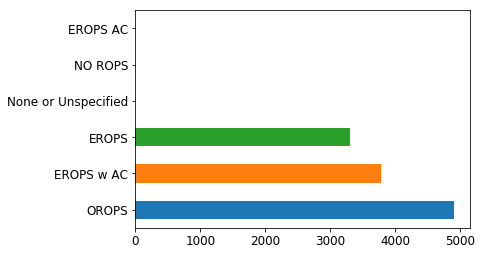

In [12]:
x = raw_valid.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)
x.Enclosure.value_counts().plot.barh();

In [13]:
flds = ['Enclosure', 'SalePrice', 'pred', 'pred_std']
enc_summ = x[flds].groupby('Enclosure', as_index=False).mean()
enc_summ

,Enclosure,SalePrice,pred,pred_std
0,EROPS,9.849178,9.837622,0.272909
1,EROPS AC,NaN,NaN,NaN
2,EROPS w AC,10.623971,10.577004,0.265071
3,NO ROPS,NaN,NaN,NaN
4,None or Unspecified,NaN,NaN,NaN
5,OROPS,9.682064,9.684020,0.223884


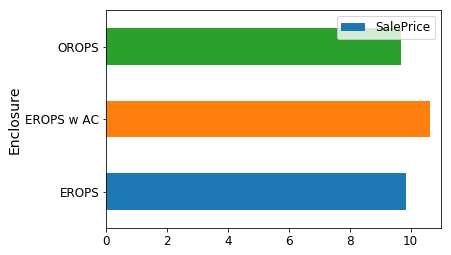

In [14]:
enc_summ = enc_summ[~pd.isnull(enc_summ.SalePrice)]
enc_summ.plot('Enclosure', 'SalePrice', 'barh', xlim=(0,11));

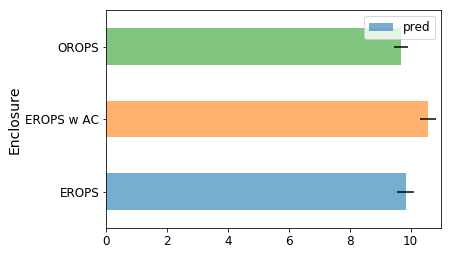

In [15]:
enc_summ.plot('Enclosure', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0,11));

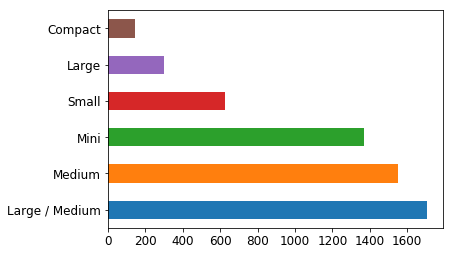

In [16]:
raw_valid.ProductSize.value_counts().plot.barh();

In [17]:
flds = ['ProductSize', 'SalePrice', 'pred', 'pred_std']
summ = x[flds].groupby(flds[0]).mean()
summ

,SalePrice,pred,pred_std
ProductSize,,,
Compact,9.735093,9.871493,0.350405
Large,10.470589,10.388342,0.352490
Large / Medium,10.691871,10.651109,0.293888
Medium,10.681511,10.615484,0.287803
Mini,9.535147,9.558917,0.250375
Small,10.324448,10.318909,0.303534


In [18]:
(summ.pred_std/summ.pred).sort_values(ascending=False)

ProductSize
Compact           0.035497
Large             0.033931
Small             0.029415
Large / Medium    0.027592
Medium            0.027112
Mini              0.026193
dtype: float64

In [19]:
fi = rf_feat_importance(m, df_trn); fi[:10]

,cols,imp
5,YearMade,0.174236
37,Coupler_System,0.118831
14,fiProductClassDesc,0.088866
13,ProductSize,0.087241
2,ModelID,0.055369
38,Grouser_Tracks,0.051839
63,saleElapsed,0.051207
10,fiSecondaryDesc,0.044084
19,Enclosure,0.041792
8,fiModelDesc,0.032783


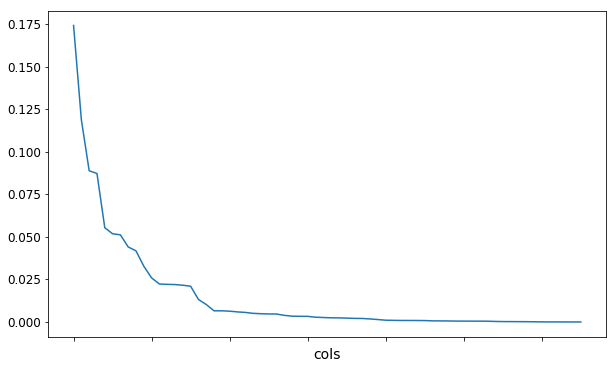

In [20]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

In [21]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

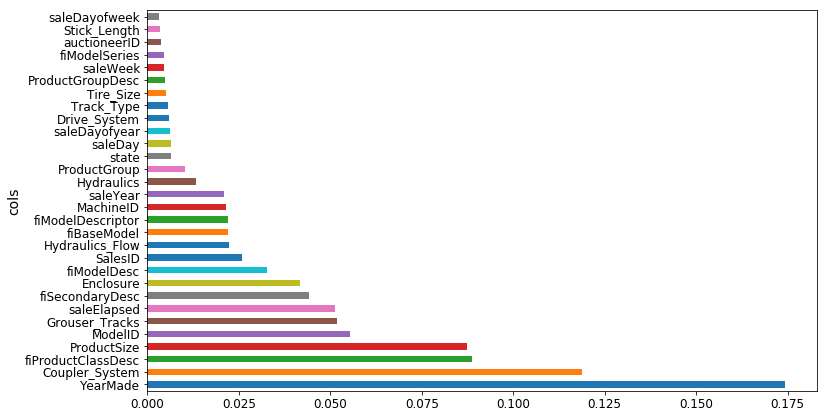

In [22]:
plot_fi(fi[:30]);

In [23]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

24

In [24]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [25]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.20696242750248214, 0.24592673923602537, 0.9104804592728487, 0.8919911164523691, 0.8940825628491788]


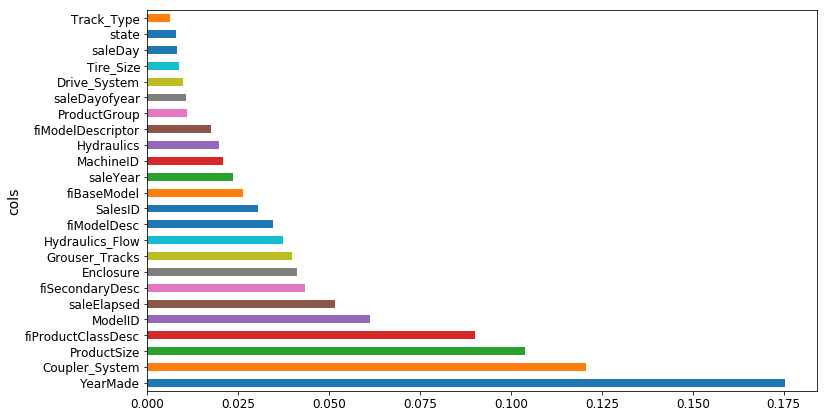

In [26]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi);

In [27]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.2073443623165046, 0.2534428384319759, 0.9101497501893691, 0.8852882192628244, 0.8924505251198709]


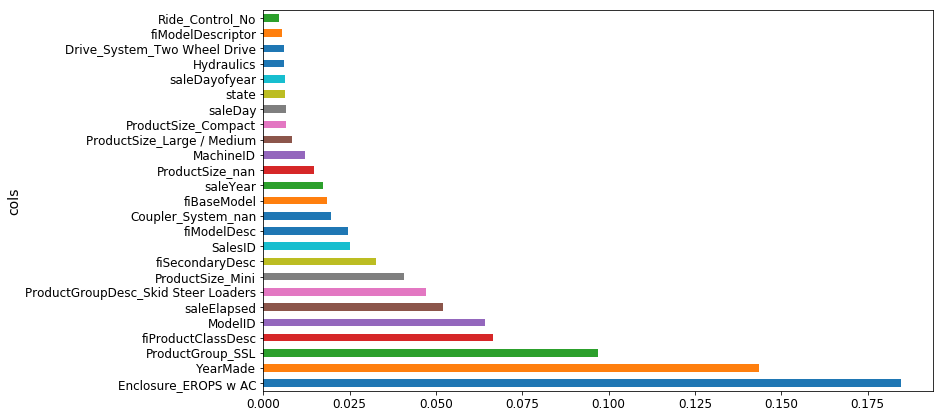

In [28]:
fi = rf_feat_importance(m, df_trn2)
plot_fi(fi[:25]);

In [29]:
from scipy.cluster import hierarchy as hc

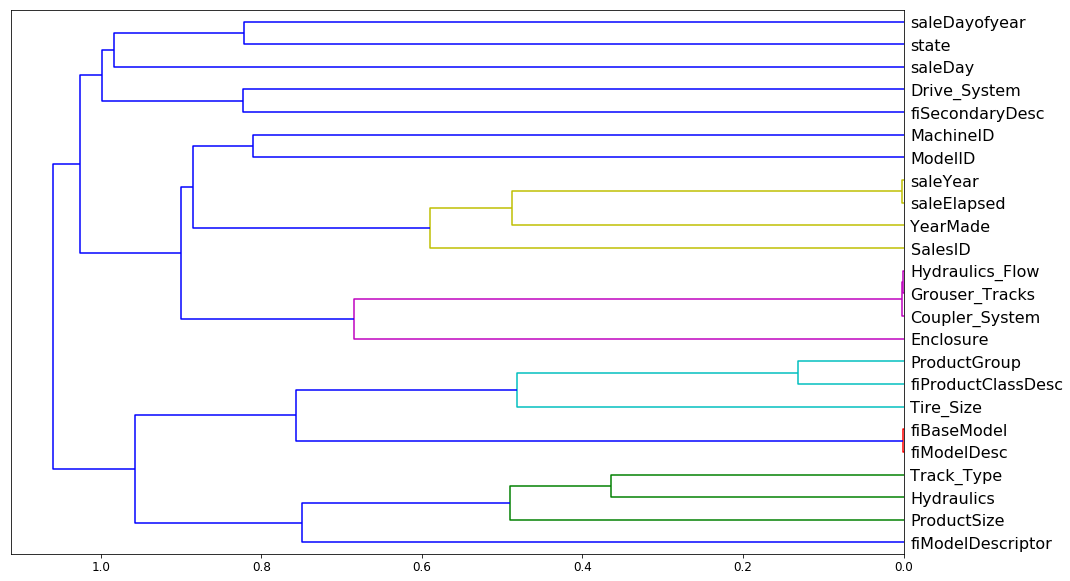

In [30]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

In [31]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=30, min_samples_leaf=5, max_features=0.6, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [32]:
get_oob(df_keep)

0.890355468590577

In [33]:
for c in ('saleYear', 'saleElapsed', 'fiModelDesc', 'fiBaseModel', 'Grouser_Tracks', 'Coupler_System'):
    print(c, get_oob(df_keep.drop(c, axis=1)))

saleYear 0.8896137887164425
saleElapsed 0.8864573116425265
fiModelDesc 0.8885957542554404
fiBaseModel 0.8892585250635765
Grouser_Tracks 0.8899979013863656
Coupler_System 0.889199117790731


In [34]:
to_drop = ['saleYear', 'fiBaseModel', 'Grouser_Tracks']
get_oob(df_keep.drop(to_drop, axis=1))

0.8889175176322387

In [35]:
df_keep.drop(to_drop, axis=1, inplace=True)
X_train, X_valid = split_vals(df_keep, n_trn)

In [36]:
np.save('tmp/keep_cols.npy', np.array(df_keep.columns))

In [37]:
keep_cols = np.load('tmp/keep_cols.npy')
df_keep = df_trn[keep_cols]

In [38]:
reset_rf_samples()

In [39]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.12580343493858667, 0.22667913932941136, 0.9669234789576345, 0.9082362645869225, 0.9086957509032503]


In [40]:
from pdpbox import pdp
from plotnine import *

ModuleNotFoundError: No module named 'pdpbox'

In [ ]:
set_rf_samples(50000)

In [ ]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train);

In [ ]:
plot_fi(rf_feat_importance(m, df_trn2)[:10]);

In [ ]:
df_raw.plot('YearMade', 'saleElapsed', 'scatter', alpha=0.01, figsize=(10,8));

In [41]:
x_all = get_sample(df_raw[df_raw.YearMade>1930], 500)

In [42]:
ggplot(x_all, aes('YearMade', 'SalePrice'))+stat_smooth(se=True, method='loess')

NameError: name 'ggplot' is not defined

In [43]:
x = get_sample(X_train[X_train.YearMade>1930], 500)

In [44]:
def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, x, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True, 
                        cluster=clusters is not None, n_cluster_centers=clusters)

In [45]:
plot_pdp('YearMade')

NameError: name 'pdp' is not defined

In [46]:
plot_pdp('YearMade', clusters=5)

NameError: name 'pdp' is not defined

In [47]:
feats = ['saleElapsed', 'YearMade']
p = pdp.pdp_interact(m, x, feats)
pdp.pdp_interact_plot(p, feats)

NameError: name 'pdp' is not defined

In [48]:
plot_pdp(['Enclosure_EROPS w AC', 'Enclosure_EROPS', 'Enclosure_OROPS'], 5, 'Enclosure')

NameError: name 'pdp' is not defined

In [49]:
df_raw.YearMade[df_raw.YearMade<1950] = 1950
df_keep['age'] = df_raw['age'] = df_raw.saleYear-df_raw.YearMade

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


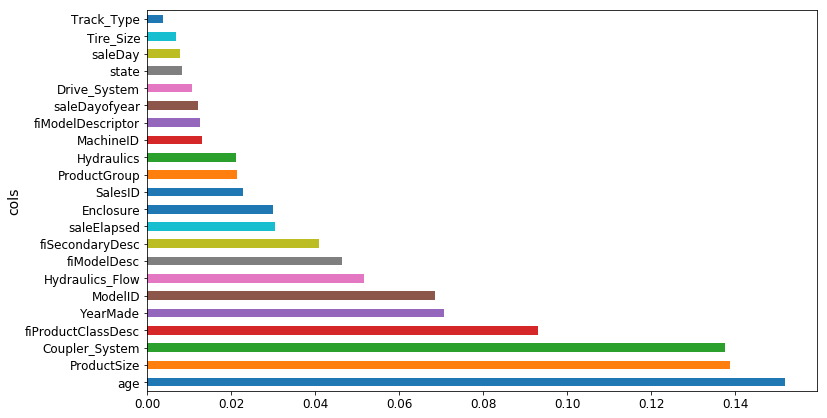

In [50]:
X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train)
plot_fi(rf_feat_importance(m, df_keep));

In [51]:
from treeinterpreter import treeinterpreter as ti

ModuleNotFoundError: No module named 'treeinterpreter'

In [52]:
df_train, df_valid = split_vals(df_raw[df_keep.columns], n_trn)

In [53]:
row = X_valid.values[None,0]; row

array([[      1999,          0,         17,          5,        665, 1284595200,          0,          1,
              3232,    4364751,          0,          0,    2300944,         12,          4,         35,
                16,        259,          0,          2,          0,         11]])

In [54]:
prediction, bias, contributions = ti.predict(m, row)

NameError: name 'ti' is not defined

In [55]:
prediction[0], bias[0]

NameError: name 'prediction' is not defined

In [56]:
idxs = np.argsort(contributions[0])

NameError: name 'contributions' is not defined

In [57]:
[o for o in zip(df_keep.columns[idxs], df_valid.iloc[0][idxs], contributions[0][idxs])]

NameError: name 'idxs' is not defined

In [58]:
contributions[0].sum()

NameError: name 'contributions' is not defined

In [59]:
df_ext = df_keep.copy()
df_ext['is_valid'] = 1
df_ext.is_valid[:n_trn] = 0
x, y, nas = proc_df(df_ext, 'is_valid')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);
m.oob_score_

0.9999975070115301

In [61]:
fi = rf_feat_importance(m, x); fi[:10]

,cols,imp
9,SalesID,0.905093
5,saleElapsed,0.078652
12,MachineID,0.010534
4,ModelID,0.001595
0,YearMade,0.001308
17,saleDayofyear,0.001034
8,fiModelDesc,0.000626
21,age,0.000303
16,saleDay,0.000250
1,Coupler_System,0.000220


In [62]:
feats=['SalesID', 'saleElapsed', 'MachineID']

In [63]:
(X_train[feats]/1000).describe()

,SalesID,saleElapsed,MachineID
count,389125.000000,3.891250e+05,389125.000000
mean,1800.452485,1.084797e+06,1206.796148
std,595.627288,1.803913e+05,430.850552
min,1139.246000,6.009984e+05,0.000000
25%,1413.348000,9.666432e+05,1087.016000
50%,1632.093000,1.134605e+06,1273.859000
75%,2210.453000,1.234138e+06,1458.661000
max,4364.741000,1.325117e+06,2313.821000


In [64]:
(X_valid[feats]/1000).describe()

,SalesID,saleElapsed,MachineID
count,12000.000000,1.200000e+04,12000.000000
mean,5786.967651,1.306609e+06,1578.049709
std,836.899608,2.497808e+04,589.497173
min,4364.751000,1.174522e+06,0.830000
25%,4408.580750,1.309219e+06,1271.225250
50%,6272.538500,1.316045e+06,1825.317000
75%,6291.792250,1.321402e+06,1907.858000
max,6333.342000,1.325203e+06,2486.330000


In [65]:
x.drop(feats, axis=1, inplace=True)

In [66]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);
m.oob_score_

0.9816889996883764

In [67]:
fi = rf_feat_importance(m, x); fi[:10]

,cols,imp
18,age,0.235897
0,YearMade,0.191305
14,saleDayofyear,0.157345
4,ModelID,0.068126
13,saleDay,0.065509
7,fiModelDesc,0.056767
12,state,0.055080
2,fiProductClassDesc,0.028158
6,Enclosure,0.027892
10,Hydraulics,0.022427


In [68]:
set_rf_samples(50000)

In [69]:
feats=['SalesID', 'saleElapsed', 'MachineID', 'age', 'YearMade', 'saleDayofyear']

In [70]:
X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.20815418210813783, 0.24840128512544998, 0.9094465277516619, 0.8898065829066438, 0.8927288528076389]


In [71]:
for f in feats:
    df_subs = df_keep.drop(f, axis=1)
    X_train, X_valid = split_vals(df_subs, n_trn)
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print(f)
    print_score(m)

SalesID
[0.2093461827729676, 0.24679050953852402, 0.9084064443082769, 0.8912310632232792, 0.8921813137011974]
saleElapsed
[0.21423152163047707, 0.2544940431048135, 0.904081678337661, 0.8843346658934985, 0.8870446959588091]
MachineID
[0.20673450015127345, 0.24651061329695081, 0.9106775261185334, 0.8914776428238872, 0.8950345406557568]
age
[0.20928953453296142, 0.24822876623040704, 0.9084560073014785, 0.8899595921393454, 0.8918863483941313]
YearMade
[0.2089493674250668, 0.25204210327598064, 0.9087533460912625, 0.8865527000221217, 0.892315550501975]
saleDayofyear
[0.20868153914823895, 0.2442563538661135, 0.9089871134576631, 0.8934533709959059, 0.8930042707173796]


In [72]:
reset_rf_samples()

In [73]:
df_subs = df_keep.drop(['SalesID', 'MachineID', 'saleDayofyear'], axis=1)
X_train, X_valid = split_vals(df_subs, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.1384347750883219, 0.2182066480180307, 0.959947906162399, 0.9149676992967563, 0.9092707790992216]


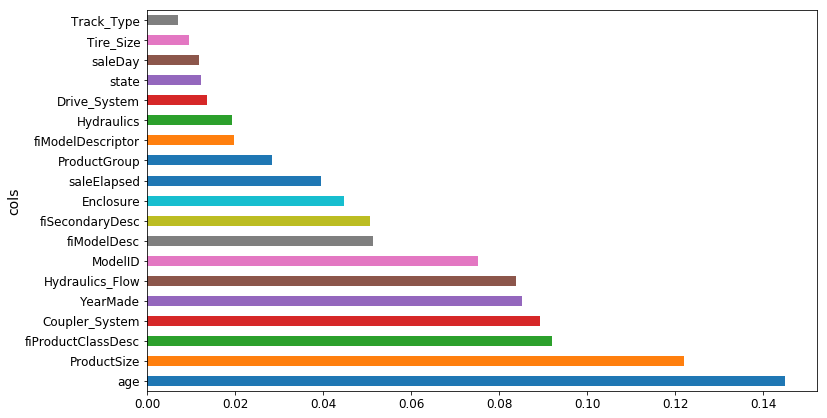

In [74]:
plot_fi(rf_feat_importance(m, X_train));

In [75]:
np.save('tmp/subs_cols.npy', np.array(df_subs.columns))

In [ ]:
m = RandomForestRegressor(n_estimators=160, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)